In [1]:
import gzip, time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def is_valid(bc):
    return (bc[4:6]=='TG'
            and bc[10:12]=='CA' 
            and bc[16:18]=='AC' 
            and bc[22:24]=='GA' 
            and bc[28:30]=='GT'
            and bc[34:36]=='AG')

def in_filtered_list(cell_bc, filtered_cell_barcodes):
    num_Ns = sum([c=='N' for c in cell_bc])
    if num_Ns > 1: return False
    elif num_Ns == 1: return np.any([cell_bc.replace('N',c) in filtered_cell_barcodes for c in 'ACTG'])
    else: return cell_bc in filtered_cell_barcodes


## Set input params

N_READS: Cutoff for the min number of reads supporting a given UMI/GFP-BC pair in a particular cell

N_UMIS: Cutoff for the min number of UMIs supporting a given cell/GFP-BC pair

N_HAMMING: Cutoff for the max hamming distance to collapse two GFP-BCs

In [25]:
larry_prefix = 'GTTGCTAGGAGAGACCATATG'
N_READS = 10
N_UMIS = 3
N_HAMMING = 3

output_prefix = 'Larry_day-0'

sample_paths = {
    'Larry_day-0': {
        'filtered_cell_barcodes_path':'barcodes/barcodes.tsv.gz',
        'larry_barcode_fastq_paths':['barcodes/Larry_system_S7_L001_{}_001.fastq.gz',
            'barcodes/Larry_system_S6_L001_{}_001.fastq.gz',
            'barcodes/Larry_system_S8_L001_{}_001.fastq.gz',
            'barcodes/Larry_system_S5_L001_{}_001.fastq.gz'
        ]
    }
}

### Count all (sample, cell-BC, UMI, LARYY-BC) combinations with a valid cell-BC and LARRY-BC

In [3]:
counts = {}

for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    filtered_cell_barcodes_set = set(filtered_cell_barcodes)

    for fastq_path in paths['larry_barcode_fastq_paths']:
        R1 = gzip.open(fastq_path.format('R1'))
        R2 = gzip.open(fastq_path.format('R2'))
        counter = 0
        start_time = time.time()
        while True:
            counter += 1
            if counter % 1000000 == 0: print(fastq_path+ ': Processed {} lines in {} seconds'.format(counter, time.time()-start_time))
            try:
                r1_line = R1.readline().decode('utf-8')
                r2_line = R2.readline().decode('utf-8')
            except:
                print('ERROR extracting {}'.format(fastq_path))
                break
            if r2_line == '': break
            if r2_line[0] in '@+': continue
            if larry_prefix in r2_line:
                larry_bc = r2_line.split(larry_prefix)[1][:40]
                cell_bc = r1_line[:16]+'-1'
                umi = r1_line[16:24]
                if is_valid(larry_bc) and in_filtered_list(cell_bc, filtered_cell_barcodes):
                    combo = (sample, cell_bc, umi, larry_bc)
                    if combo in counts:
                        counts[combo] += 1
                    else:
                        counts[combo] = 1


barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 1000000 lines in 14.133716106414795 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 2000000 lines in 28.340556859970093 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 3000000 lines in 41.80684494972229 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 4000000 lines in 56.10518288612366 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 5000000 lines in 70.00225687026978 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 6000000 lines in 84.42418193817139 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 7000000 lines in 98.42103576660156 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 8000000 lines in 112.3191339969635 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 9000000 lines in 126.36743497848511 seconds
barcodes/Larry_system_S7_L001_{}_001.fastq.gz: Processed 10000000 lines in 140.66051578521729 sec

barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 35000000 lines in 512.647481918335 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 36000000 lines in 529.0447018146515 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 37000000 lines in 545.037318944931 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 38000000 lines in 565.0010149478912 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 39000000 lines in 584.8846368789673 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 40000000 lines in 601.7119328975677 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 41000000 lines in 617.5741739273071 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 42000000 lines in 633.5346648693085 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 43000000 lines in 649.2436039447784 seconds
barcodes/Larry_system_S6_L001_{}_001.fastq.gz: Processed 44000000 lines in 665.4648399353027 

barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 29000000 lines in 424.8110420703888 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 30000000 lines in 439.10650420188904 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 31000000 lines in 454.5688261985779 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 32000000 lines in 468.9592549800873 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 33000000 lines in 483.204017162323 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 34000000 lines in 497.52818608283997 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 35000000 lines in 511.8300552368164 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 36000000 lines in 526.5843069553375 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 37000000 lines in 540.3441829681396 seconds
barcodes/Larry_system_S8_L001_{}_001.fastq.gz: Processed 38000000 lines in 554.06509304046

barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 27000000 lines in 424.79282307624817 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 28000000 lines in 441.04706478118896 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 29000000 lines in 456.2985291481018 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 30000000 lines in 471.19148898124695 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 31000000 lines in 486.21552205085754 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 32000000 lines in 501.31154894828796 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 33000000 lines in 516.3139588832855 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 34000000 lines in 532.7527208328247 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 35000000 lines in 549.0961720943451 seconds
barcodes/Larry_system_S5_L001_{}_001.fastq.gz: Processed 36000000 lines in 565.3879539

## Set parameters for clonal analsysis

N_READS: Cutoff for the min number of reads supporting a given UMI/GFP-BC pair in a particular cell

N_UMIS: Cutoff for the min number of UMIs supporting a given cell/GFP-BC pair

N_HAMMING: Cutoff for the max hamming distance to collapse two GFP-BCs

Retaining 1506741 out of 5280870 (Sample,Cell-BC,UMI,GFP-BC) combinations


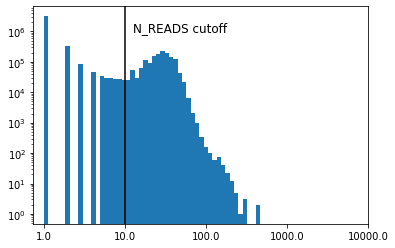

In [4]:
num_reads = [v for k,v in counts.items()]
plt.hist(np.log(num_reads)/np.log(10), bins=50)
plt.axvline(np.log(N_READS)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(N_READS)/np.log(10)*1.1,10**6,'N_READS cutoff', fontsize=12)
plt.yscale('log')

counts_filtered = {k:v for k,v in counts.items() if v >= N_READS}
print('Retaining '+repr(len(counts_filtered))+ ' out of '+repr(len(counts))+' (Sample,Cell-BC,UMI,GFP-BC) combinations')

## Collapse GFP-BCs by hamming distance

In [5]:
def hamming(bc1,bc2): return np.sum([x1 != x2 for x1,x2 in zip(bc1,bc2)])

all_gfp_bcs = sorted(set([k[3] for k in counts_filtered]))
good_gfp_bcs = []
bc_map = {}
for i,bc1 in enumerate(all_gfp_bcs):
    if i > 0 and i % 500 == 0: print('Mapped '+repr(i)+' out of '+repr(len(all_gfp_bcs))+' barcodes')
    mapped = False
    for bc2 in good_gfp_bcs:
        if hamming(bc1,bc2) <= N_HAMMING:
            mapped = True
            bc_map[bc1] = bc2
            break
    if not mapped:
        good_gfp_bcs.append(bc1)

print('\nCollapsed '+repr(len(bc_map))+' barcodes')
for bc in good_gfp_bcs: bc_map[bc] = bc

Mapped 500 out of 6910 barcodes
Mapped 1000 out of 6910 barcodes
Mapped 1500 out of 6910 barcodes
Mapped 2000 out of 6910 barcodes
Mapped 2500 out of 6910 barcodes
Mapped 3000 out of 6910 barcodes
Mapped 3500 out of 6910 barcodes
Mapped 4000 out of 6910 barcodes
Mapped 4500 out of 6910 barcodes
Mapped 5000 out of 6910 barcodes
Mapped 5500 out of 6910 barcodes
Mapped 6000 out of 6910 barcodes
Mapped 6500 out of 6910 barcodes

Collapsed 2404 barcodes


## Filter GFP-barcodes by UMI
Index (UMI, GFP-BC) combinations to cells, then filter out BCs supported by fewer than N_UMIS UMIs


Final annotation has 3836 clones in 5675 cells


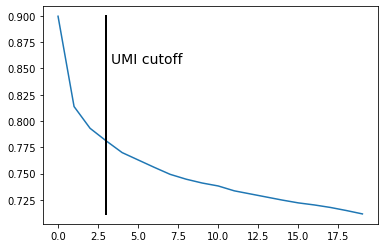

In [24]:
cell_data = {}
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        cell_data[(sample,cell_bc)] = {}

for sample,cell_bc,umi,larry_bc in counts_filtered.keys():
    if (sample,cell_bc) in cell_data:
        if not larry_bc in cell_data[(sample,cell_bc)]:
            cell_data[(sample,cell_bc)][larry_bc] = 0
        cell_data[(sample,cell_bc)][larry_bc] += 1

num_cells_with_barcode = np.zeros(20)
for larry_bc_counts in cell_data.values():
    if len(larry_bc_counts)>0:
        num_cells_with_barcode[:np.min([20,np.max(list(larry_bc_counts.values()))])] += 1
efficiency = num_cells_with_barcode / len(cell_data)
plt.plot(range(20),efficiency)
plt.plot([N_UMIS,N_UMIS],[np.min(efficiency),np.max(efficiency)],'-k',linewidth=2)
plt.text(N_UMIS*1.1,np.max(efficiency)*.95,'UMI cutoff',fontsize=14)

final_BCs = {}
for k,larry_bc_counts in cell_data.items():
    final_BCs[k] = '-'.join(sorted([k for k,v in larry_bc_counts.items() if v >= N_UMIS]))
print('\nFinal annotation has '+repr(len(set(final_BCs.values())))+' clones in '+repr(len([k for k,v in final_BCs.items() if len(v)>0]))+' cells')



## Write output

In [28]:
output = []
for sample,paths in sample_paths.items():
    filtered_cell_barcodes = gzip.open(paths['filtered_cell_barcodes_path']).read().decode('utf-8').split('\n')
    for cell_bc in filtered_cell_barcodes:
        output.append(sample+','+cell_bc+','+final_BCs[(sample,cell_bc)])
open(output_prefix+'.larry_clones.csv','w').write('\n'.join(output))

594635